<a href="https://colab.research.google.com/github/MohammadG4/PRODIGY_ML_01/blob/main/House_Prices_Advanced_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Train csv file**


### Reading the file

In [336]:
import pandas as pd
allData = pd.read_csv("/content/train - House Prices - Advanced Regression Techniques.csv")

allData.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# **Viewing columns to analyze**

In [337]:
allData.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## **Dropping unnecessary columns as the model is predicting the prices of houses based on their Square Footage and the number of Bedrooms and Bathrooms**

In [338]:
drops = []
for col in allData.columns:
  if col != 'LotArea' and col != 'GrLivArea' and col != 'BedroomAbvGr'and col != 'FullBath'and col != 'HalfBath' and col != 'SalePrice':
     drops.append(col)
allData = allData.drop(drops,axis=1)

# **Showing heatmap for more analysis**

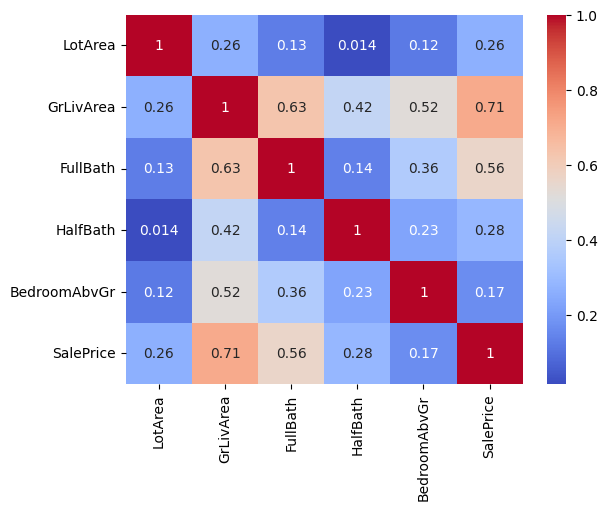

In [339]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = allData.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


# **Creating pairplot Graphs for more analysation**





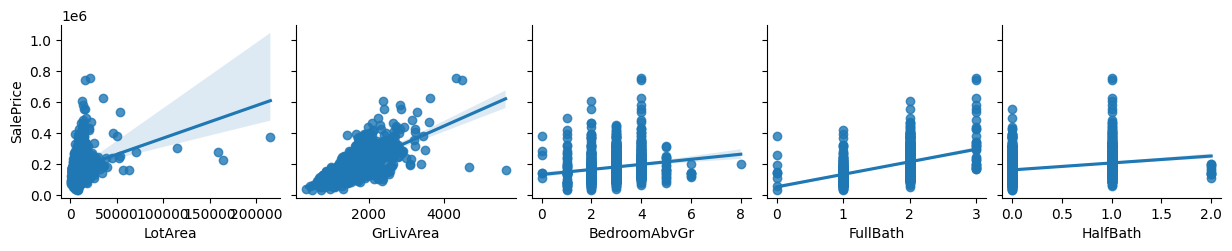

In [340]:
sns.pairplot(allData, x_vars=[ 'LotArea','GrLivArea','BedroomAbvGr','FullBath','HalfBath'],  y_vars='SalePrice',kind= 'reg'  ,diag_kind='auto')
plt.show()


In [341]:
allData.head()

,LotArea,GrLivArea,FullBath,HalfBath,BedroomAbvGr,SalePrice
0,8450,1710,2,1,3,208500
1,9600,1262,2,0,3,181500
2,11250,1786,2,1,3,223500
3,9550,1717,1,0,3,140000
4,14260,2198,2,1,4,250000


In [342]:
allData.shape


(1460, 6)

# **Checking for null values**

In [343]:
allData.isnull().sum()


LotArea         0
GrLivArea       0
FullBath        0
HalfBath        0
BedroomAbvGr    0
SalePrice       0
dtype: int64

# **Splitting the data into Dependant (y) and Independent(x)**

In [344]:
x = allData.iloc[:,:-1]

y = allData.iloc[:, 5:6]

In [345]:
print(x)
print(y)


      LotArea  GrLivArea  FullBath  HalfBath  BedroomAbvGr
0        8450       1710         2         1             3
1        9600       1262         2         0             3
2       11250       1786         2         1             3
3        9550       1717         1         0             3
4       14260       2198         2         1             4
...       ...        ...       ...       ...           ...
1455     7917       1647         2         1             3
1456    13175       2073         2         0             3
1457     9042       2340         2         0             4
1458     9717       1078         1         0             2
1459     9937       1256         1         1             3

[1460 rows x 5 columns]
      SalePrice
0        208500
1        181500
2        223500
3        140000
4        250000
...         ...
1455     175000
1456     210000
1457     266500
1458     142125
1459     147500

[1460 rows x 1 columns]


# **Rescaling the Data to be from 0 to 1**

In [346]:
from sklearn.preprocessing import MinMaxScaler
scalex = MinMaxScaler()
scaley = MinMaxScaler()
x = scalex.fit_transform(x)
y = scaley.fit_transform(y.values.reshape(-1, 1))


# **Creating the Ai Model**
*   Splitting each of x and y to train and test

*   Creating the Linear Regression model

*   Previewing the score in r2 score metrics





In [347]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)
model = LinearRegression()
model.fit(x_train,y_train)
scores = cross_val_score(model,x,y, scoring = 'r2' ,cv=5)
print(scores.mean())



0.5809191471990738


# **Importing the Test file**

In [348]:
newData = pd.read_csv("/content/test - House Prices - Advanced Regression Techniques.csv")
newData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# **Dropping unnecessary columns**

In [349]:
newX = newData[['LotArea', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr']]
newX

,LotArea,GrLivArea,FullBath,HalfBath,BedroomAbvGr
0,11622,896,1,0,2
1,14267,1329,1,1,3
2,13830,1629,2,1,3
3,9978,1604,2,1,3
4,5005,1280,2,0,2
...,...,...,...,...,...
1454,1936,1092,1,1,3
1455,1894,1092,1,1,3
1456,20000,1224,1,0,4
1457,10441,970,1,0,3


**Scaling the newX**

In [350]:
newX_scaled = scalex.transform(newX)

# **Inverse Scaling the Predicted Prices**

In [351]:
newPred = scaley.inverse_transform(model.predict(newX_scaled))
newPred

array([[123145.82965166],
       [146315.2719147 ],
       [208758.57627212],
       ...,
       [107491.06838825],
       [102347.10054025],
       [242039.87826649]])

In [352]:
newData = newX.copy()
newData['Predicted-Sale-Price'] = newPred
newData.head()

,LotArea,GrLivArea,FullBath,HalfBath,BedroomAbvGr,Predicted-Sale-Price
0,11622,896,1,0,2,123145.829652
1,14267,1329,1,1,3,146315.271915
2,13830,1629,2,1,3,208758.576272
3,9978,1604,2,1,3,203346.194367
4,5005,1280,2,0,2,189116.896472


# **Exporting the Final with Predections**

In [353]:
newData.to_csv('Predicted_Prices.csv', index=False)